<u><center><span style="font-family:Calisto; font-size:2.5em;">Exit Analysis</span></center></u>

<h2>Table of contents</h2>  
<div class="alert alert-block alert-info" style="margin-top: 20px">      
    <ol>          
        <li><a href="#intro">Introduction</a></li>          
        <li><a href="#datacol">Data Collection</a></li>          
        <li><a href="#datawrang">Data Wrangling</a></li>          
        <li><a href="#eda">Explanatory Data Analysis</a></li>          
        <li><a href="#Questions">Questions & Answers</a></li>  
        <li><a href="#relations">Exploring relations between variables</a></li>
         <li><a href="#conclusion">Conclusion</a></li>
        <li><a href="#fnotes">Final Notes</a></li>
    </ol>  
</div>  
<br>  
<hr>

## <u id ="intro">**Introduction**</u>    
### **Note: After the first analysis, the company was interested in in-depth-analysis, so they provided more accurate comprehensive dataset**  
<span style="font-family:Calisto; font-size:1.5em;"> In XYZ company, many employees leave each month. The stackholders want to know facts about employees who leave, so the recrutment will be ready and will keep enough supply for hot jobs that employees leave, this is on one hand. On the other hand, they want to know what rules have less lifespan more than others as well as other questions to answer.</span>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
plt.rcParams.update({'font.size': 14.5}) # setting plots font size for clarity
print("Imported Necessary libs")

Imported Necessary libs


# <u id = "datawrang">DATA Wrangling</u>

## <u id = "datacol">DATA Collection process</u>
### The Data was provided by the company from their system.

In [2]:
# reading the data from the saved csv file
df_main = pd.read_csv(r"D:\Work\Products Databses\personnel\Notebooks\full exit data.csv", index_col=[0], infer_datetime_format=True)

In [3]:
df_main.head()

,code,nat,dept,job,join,leave,martial_status,birth_date,qualification
0,21,Pakistani,Consumer Products,Sales Supervisor,01/07/1989,31/03/2014,Married,09/06/1954,High School
1,26,Indian,General Products,Strategic New Business Dev. Manager,01/07/1998,31/12/2017,Married,16/04/1949,NaN
2,27,Indian,Office Furniture & Furnishing,Assistant Manager - Office Furniture,01/07/1990,28/02/2015,Married,28/10/1947,Bachelors
3,29,Indian,Home Appliances Service Center,Team Leader,01/10/1998,29/11/2012,Married,05/02/1949,NaN
4,31,Indian,HR & Administration,Supervisor - Payroll,01/07/1988,28/02/2015,Married,25/03/1946,Bachelors


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   code            887 non-null    int64 
 1   nat             887 non-null    object
 2   dept            887 non-null    object
 3   job             887 non-null    object
 4   join            887 non-null    object
 5   leave           887 non-null    object
 6   martial_status  887 non-null    object
 7   birth_date      887 non-null    object
 8   qualification   751 non-null    object
dtypes: int64(1), object(8)
memory usage: 69.3+ KB


As we notice we have some missing values in qualificaiton column, however we will check each column for any wrong data as we have a few number of columns

In [5]:
# checking for duplciates
df_main[df_main.duplicated()].count()

code              0
nat               0
dept              0
job               0
join              0
leave             0
martial_status    0
birth_date        0
qualification     0
dtype: int64

No duplicates in the dataframe

In [6]:
# we will drop code as we dont need it
df_main.drop(["code"], axis=1, inplace=True)

In [7]:
df_main["nat"].value_counts()

Nepali           366
Indian           164
Sri Lankan       161
Filipino         113
Egyptian          22
Kenyan            18
Pakistan           9
Bangladeshi        6
Tunisian           6
Jordanian          5
Dutch              2
Moroccan           2
Lebanese           2
Netherland         2
Ghana              2
Italian            1
South African      1
Syrian             1
Pakistani          1
American           1
Algerian           1
Nepalese           1
Name: nat, dtype: int64

In [8]:
# we will make some replacements to correct the inconsistency and spelling of wrong nationalities
replacements = {"Nepali":"Nepalese", "Pakistan":"Pakistani", "Ghana":"Ghanaian", "Netherland":"Dutch"}
df_main["nat"].replace(replacements, inplace=True)

In [9]:
#checking the change
df_main["nat"].value_counts()[0:10]

Nepalese       367
Indian         164
Sri Lankan     161
Filipino       113
Egyptian        22
Kenyan          18
Pakistani       10
Bangladeshi      6
Tunisian         6
Jordanian        5
Name: nat, dtype: int64

Now the values look ok, we move to the next column

In [10]:
df_main["dept"].value_counts()

Consumer Products                         190
Logistics                                 190
Consumer Electronics & Home Appliances    109
General Products                           90
Home Appliances Service Center             76
Office Equipment Service Center            68
Office Furniture & Furnishing              65
Office Equipment & Business Solutions      51
Finance                                    23
HR & Administration                        16
Directors Office                            5
IT                                          4
Name: dept, dtype: int64

Departments column is ok

In [11]:
df_main["job"].value_counts()[0:10]

Merchandiser              197
Helper                     61
Sales Executive            50
Driver                     43
Technician                 33
Asst Technician            24
Senior Sales Executive     23
Van Salesman               21
Warehouse Asst             20
Technician - Air Cons      18
Name: job, dtype: int64

In [12]:
df_main["job"].unique()

array(['Sales Supervisor', 'Strategic New Business Dev. Manager',
       'Assistant Manager - Office Furniture', 'Team Leader',
       'Supervisor - Payroll', 'Storekeeper',
       'Supervisor - Small Appl & Electronics', 'Foreman',
       'Senior Technician', 'Supervisor', 'Senior Sales Executive',
       'Asst Service Manager', 'Driver', 'Upholster', 'Asst Storekeeper',
       'Asst Manager Projects', 'Helper', 'Furnishing Sales Specialist',
       'Senior Receivable Accountant', 'Asst Technician',
       'Supervisor - Appliances', 'Fitter', 'Tailor',
       'Supervisor Accounts Payable', 'Store Supervisor',
       'Executive Secretary', 'Skilled Helper', 'Security Guard',
       'Sales Executive', 'Upholster - Team Leader',
       'Supervisor - Projects', 'Skilled Driver - Fitter',
       'Carpet Fitter', 'Manager - OFD', 'Driver Cum Asst',
       'Sr. Interior Designer', 'Senior Electrician', 'Technician',
       'Forklift Operator', 'Office Boy', 'Manager - OABS',
       'Warehous

I think we are ok with jobs column, at least for the top 10

we have joing date, birth date and leave date as objects, we should convert them to the right format in order to be beneficial for us

In [13]:
df_main["join"] = pd.to_datetime(df_main["join"]) 
df_main["leave"] = pd.to_datetime(df_main["leave"]) 
df_main["birth_date"] = pd.to_datetime(df_main["birth_date"])

In [14]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nat             887 non-null    object        
 1   dept            887 non-null    object        
 2   job             887 non-null    object        
 3   join            887 non-null    datetime64[ns]
 4   leave           887 non-null    datetime64[ns]
 5   martial_status  887 non-null    object        
 6   birth_date      887 non-null    datetime64[ns]
 7   qualification   751 non-null    object        
dtypes: datetime64[ns](3), object(5)
memory usage: 62.4+ KB


- now our columns were converted to the valid format of date time, however we can use this in analysis, but also we need to make some numbers from them, so we can improve our dataset

* we will first make a service columns with all service years by usbtracting the leave date from joining date

In [15]:
# subtracting joining from leave to get the service period of the employee
df_main["service"] = (df_main["leave"] - df_main["join"]).dt.days / 365

In [16]:
# we will check if there is any wrong values 
df_main[df_main["service"] <= 0].head()

,nat,dept,job,join,leave,martial_status,birth_date,qualification,service
431,Pakistani,Finance,Receivable Supervisor,2013-09-01,2013-03-28,Married,1977-11-05,Bachelors,-0.430137
434,Lebanese,Consumer Products,Senior Sales Executive,2013-01-26,2013-01-04,Married,1984-08-22,Masters,-0.060274
438,Indian,Consumer Products,Sales Coordinator,2013-02-03,2013-01-09,Single,1984-10-04,Bachelors,-0.068493
529,Indian,Consumer Electronics & Home Appliances,Sales Executive,2014-08-03,2014-08-03,Single,1989-01-12,NaN,0.000000
551,Nepalese,Consumer Electronics & Home Appliances,Merchandiser,2014-04-28,2014-01-06,Single,1987-10-23,NaN,-0.306849


- we can see that there are some wrong dates, because we cannot consider that the employee left the work before joining, so we can fix the dates, simply by removing them.    So in order to avoid any problems we will drop them.

In [17]:
# setting the data for values bigger than zero 
df_main = df_main[df_main["service"] > 0]

now we can create a column using the birth date and joining date to know the age of employee when joind the company

In [18]:
# subtracting birthdate from joing to get the age of employee at the time of joining 
df_main["join_age"] = (df_main["join"] - df_main["birth_date"]).dt.days / 365

In [19]:
# we will check if there is any wrong values
df_main[df_main["join_age"] <= 0].head()

,nat,dept,job,join,leave,martial_status,birth_date,qualification,service,join_age


- for joining age we dont have wrong values

In [20]:
# inspecting martial status column
df_main["martial_status"].value_counts()

Married     496
Single      361
Divorced      5
Widow         1
Name: martial_status, dtype: int64

- martial status columns looks fine

In [21]:
df_main["qualification"].value_counts()

High School                  264
Secondary School             183
Bachelors                    155
Diploma                       70
Primary School                24
Masters                       22
Information Not Available     18
Chartered Accountant           1
Name: qualification, dtype: int64

We have some employees that their qualification information is not available, so we will replace them with null values in order to decide how to deal with this later

In [22]:
# replacing with the correct null values
df_main.loc[df_main["qualification"]=="Information Not Available","qualification"] = np.nan

In [23]:
# Checking the replacement
df_main[["qualification"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 885
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualification  719 non-null    object
dtypes: object(1)
memory usage: 13.5+ KB


* We have high school and secodnary school, which is the same, so we are going to change secondary school to high school as well.

In [24]:
df_main.loc[df_main["qualification"]=="Secondary School","qualification"] = "High School"

- One final step in wrangling is to set the index as the leave date in order to help us answer the below questions.

In [25]:
df_main.set_index("leave",inplace=True)

In [26]:
df_main.sort_index(inplace=True)

In [27]:
# one final check  
df_main.head()

,nat,dept,job,join,martial_status,birth_date,qualification,service,join_age
leave,,,,,,,,,
2012-03-10,Nepalese,Consumer Products,Merchandiser,2008-05-03,Single,1986-01-29,NaN,3.854795,22.273973
2012-05-09,Filipino,Consumer Products,Assistant Sales Executive,2002-07-20,Married,1978-08-20,NaN,9.810959,23.931507
2012-05-11,Nepalese,Consumer Products,Merchandiser,2010-05-08,Single,1985-10-13,NaN,2.010959,24.583562
2012-06-12,Nepalese,Home Appliances Service Center,Helper,2007-03-12,Single,1987-12-01,NaN,5.257534,19.290411
2012-07-10,Nepalese,Consumer Electronics & Home Appliances,Merchandiser,2008-01-04,Single,1982-06-08,NaN,4.517808,25.591781


---

# <u id="eda">Explanatory Data Analysis</u>

# <u id="Questions">Questions & Answers</u>

# What are the minimum, maximum and average service period for employee and their ages at joining time?

In [28]:
# providing summary statisitcs for service period
df_main.describe()

,service,join_age
count,863.000000,863.000000
mean,6.005333,29.639734
std,6.325528,7.122875
min,0.005479,17.980822
25%,1.893151,24.190411
50%,3.556164,28.709589
75%,7.646575,33.745205
max,31.298630,58.460274


### <u>**Explaining the service summary**</u>
* The number of records is **863** employees.  
* We can see that the average service period for employee is **6** years.  
* We can see that the standard deviation is **6.3** years > which is considered high and means that data includes wide range of values.  
* The minimum service period is **0.00547** year which means 5 month.  
* The first quartile is **1.89** years.  
* The Second quartile - Median is **3.5** years.  
* The third quartile is **7.65** years.  
* The interquartile range (IQR) is 7.65 - 1.89 = **5.76** years.  
* The maximum service period is **31** years.   
* If we considered that normal distribution of all data consisits of 3 standard deviations, service periods that are more than 18 years will be more likely to be considered as outliers.


### <u>**Explaining the joining age summary**</u>
* The number of records is **863** employees.  
* We can see that the average joining age for employee is **29.6** years.  
* We can see that the standard deviation is **7** years > which is considered high and means that data includes wide range of values.  
* The minimum age is **17.9** year which means 5 month.  
* The first quartile is **24.19** years.  
* The Second quartile - Median is **28.7** years.  
* The third quartile is **33.75** years.  
* The interquartile range (IQR) is 33.75 - 24.19 = **9.56** years.  
* The maximum age of joining is **58** years.  
* If we considered that normal distribution of all data consisits of 3 standard deviations, ages that are more than 21 years will be more likely to be considered as outliers.

Text(6.005333417990762, 300, 'Average')

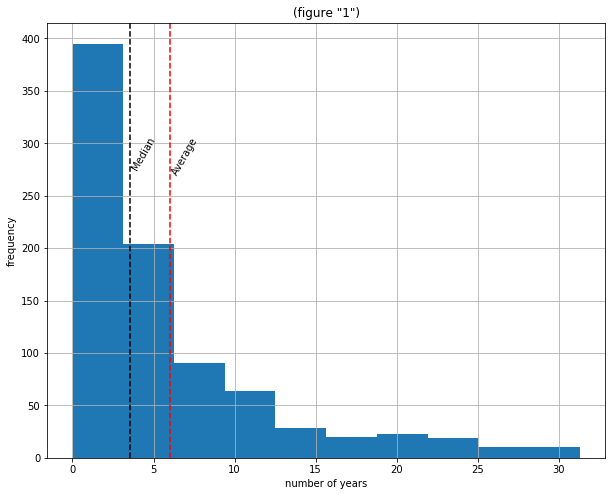

In [29]:
# plotting service period
df_main['service'].hist(bins=10,figsize=(10,8))
plt.xlabel('number of years')
plt.ylabel('frequency')
plt.title('(figure "1")')
plt.axvline(df_main['service'].median(), color='k', label='Median',linestyle='--')
plt.text(df_main['service'].median(),300,'Median',color='k', rotation=60)
plt.axvline(df_main['service'].mean(), color='r', label='Median',linestyle='--')
plt.text(df_main['service'].mean(),300,'Average',color='k',rotation=60)

### <u>explaining histogram (figure 1)</u>
* We notice that the sample has positive skewness.
* More than 350 employees did not compelete 5 years at least in the company
* we can see on the right side, there is a few number of employees they worked for more than 30 years, they are outliers.
#### As we have outliers, using The Average (mean) ~6.6~ will be misleading, it is better to use median **4.4** as a less misleading value for the average of service period for the employee

Text(0.5, 1.0, '(figure "2")')

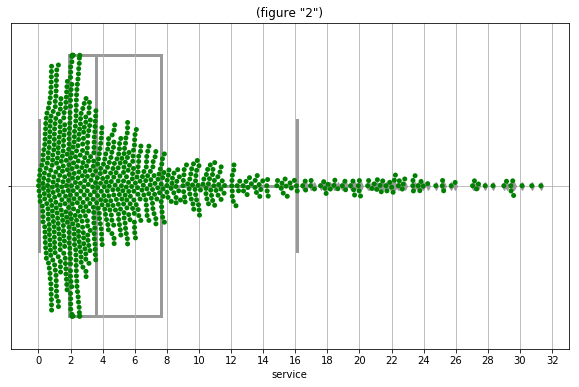

In [30]:
# applying box plot and sawrm plot to show the sample distrubtion
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0, 41,2))
sns.boxplot(x='service', data=df_main,color='w', linewidth=3)
sns.swarmplot(x='service', data=df_main, color='green')
plt.grid()
plt.title('(figure "2")')

### <u>Explaining Service Box plot (figure 2)</u>
#### We notice that most of population is between 0 and 8 years.
#### Employees who spent more than 16 years are considered outliers (too far from the average employees).

Text(0.5, 1.0, '(figure "3-1")')

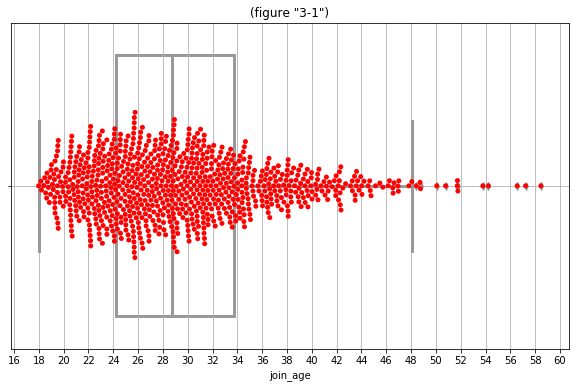

In [31]:
# applying box plot and sawrm plot to show the sample distrubtion
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0, 61,2))
sns.boxplot(x='join_age', data=df_main,color='w', linewidth=3)
sns.swarmplot(x='join_age', data=df_main, color='red')
plt.grid()
plt.title('(figure "3-1")')

Text(0, 0.5, 'frequency')

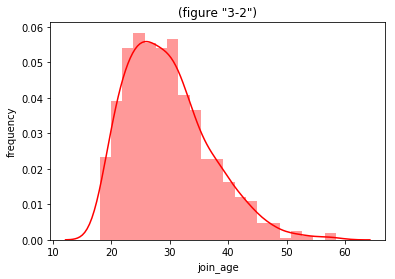

In [32]:
sns.distplot(df_main['join_age'],color='r')
plt.title('(figure "3-2")')
plt.ylabel('frequency')

## <u>Explaining Join age Box plot (figure 4)</u>
#### We notice that most of population age is between 18 and 48 years.
#### Employees who are more than 48 years are considered outliers (too far from the average employees).

# What are the nationalities that tend to leave the company more than the others?

,percentages,counts
Nepalese,41.599073,359
Indian,18.424102,159
Sri Lankan,17.960603,155
Filipino,13.093859,113
Egyptian,2.433372,21
Kenyan,2.085747,18
Pakistani,0.926999,8
Bangladeshi,0.695249,6
Tunisian,0.695249,6
Jordanian,0.579374,5


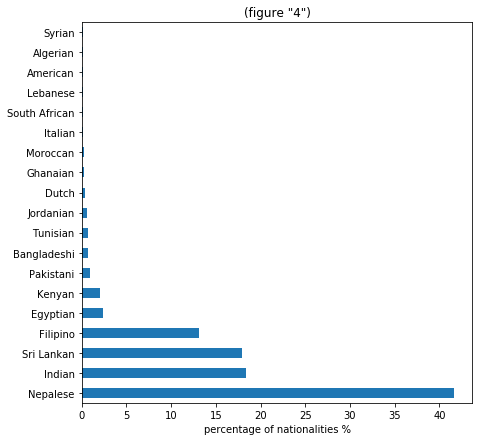

In [33]:
# calculating the nationalities percentages in the distribution
nat_count = pd.DataFrame({'percentages':df_main['nat'].value_counts() / len(df_main['nat']) * 100 , 'counts': df_main['nat'].value_counts()})
plt.figure(figsize=(7,7))
nat_count.percentages.plot(kind='barh')
plt.xlabel('percentage of nationalities %')
plt.title('(figure "4")')
nat_count

### <u>Nationalities column statistics (figure 4)</u>
#### We notice that the dominant nationalities of the sample are Nepalese, Indians, Sri-Lankans and Filipinos (As they represent the most of the company's population)

# What are the top 10 positions that they tend to leave the company more than others?

,percentages,counts
Merchandiser,21.900348,189
Helper,7.068366,61
Sales Executive,5.677868,49
Driver,4.634994,40
Technician,3.823870,33
Asst Technician,2.780997,24
Senior Sales Executive,2.549247,22
Warehouse Asst,2.317497,20
Van Salesman,2.317497,20
Technician - Air Cons,2.085747,18


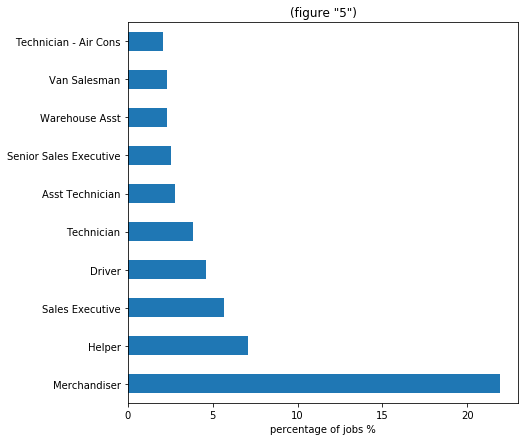

In [34]:
# calculating the nationalities percentages in the distribution
plt.figure(figsize=(7,7))
job_count = pd.DataFrame({'percentages':df_main['job'].value_counts() / len(df_main['job']) * 100 , 'counts': df_main['job'].value_counts()})
job_count['percentages'][0:10].plot(kind='barh')
plt.xlabel('percentage of jobs %')
plt.title('(figure "5")')
job_count.head(10)

### <u>Positions/jobs column statistics (figure 5)</u>
#### There are too many jobs, however we choose to show only the top 10 jobs in order to display them properly
#### We notice that most of percentage of the sample is Merchanidisers.
#### Knowing the hot jobs that they require recruting on fast pace will make the company always ready to face these changes without interrupting the workflow.

# What is the average number of people they are leaving each month/quarter/year?

In [35]:
# the average number of people that they leave each month
avg_per_month = df_main.loc['2013':'2019',['nat']].resample('M').count().mean().round()
avg_per_quarter = df_main.loc['2013':'2019',['nat']].resample('Q').count().mean().round()
avg_per_half_year = df_main.loc['2013':'2019',['nat']].resample('2Q').count().mean().round()
avg_anual = df_main.loc['2013':'2019',['nat']].resample('A').count().mean().round()
print("The expected amount of employees to leave per month are:",avg_per_month[0],'\nper Quarter:', avg_per_quarter[0], '\nper half year:',avg_per_half_year[0], '\nper year', avg_anual[0])

The expected amount of employees to leave per month are: 10.0 
per Quarter: 30.0 
per half year: 56.0 
per year 120.0


# General year-month Statistics

nat                                                                    \
leave     1     2     3     4     5     6     7     8     9    10    11    12   
leave                                                                           
2012    0.0   0.0   1.0   0.0   2.0   1.0   2.0   2.0   1.0   2.0   6.0   8.0   
2013    4.0   4.0   5.0   3.0   3.0   5.0   3.0   4.0   8.0   6.0   4.0   7.0   
2014   16.0  14.0   6.0  10.0   2.0   7.0  11.0   6.0   5.0  11.0   4.0   5.0   
2015   18.0   8.0   8.0   8.0   7.0  12.0   3.0   8.0  13.0   8.0   7.0   3.0   
2016    7.0   8.0   9.0   6.0  14.0   4.0   5.0   5.0  14.0  12.0   3.0  13.0   
2017   32.0  14.0  16.0  22.0  32.0   6.0  13.0  29.0  22.0  17.0  16.0  18.0   
2018   19.0  13.0  16.0  12.0   7.0  12.0  16.0   4.0   4.0   9.0   8.0   2.0   
2019   25.0  20.0  12.0  11.0  11.0   6.0   9.0   6.0  11.0   6.0   4.0   2.0   

      Total_per_year  
leave                 
leave                 
2012              25  
2013              56  
2014              97  
2015             103  
2016             100  
2017             237  
2018             122  
2019             123

Text(0.5, 1.0, '(figure "6")')

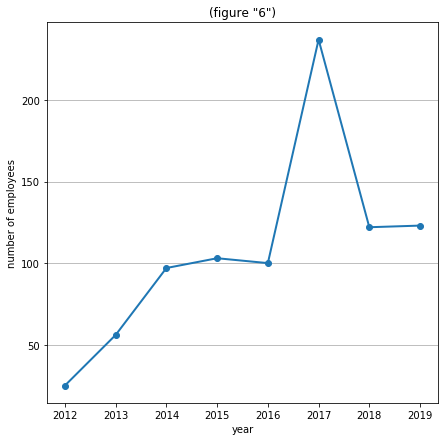

In [36]:
# counting how many people left each year
count_by_month = df_main[['nat']].pivot_table(index=df_main.index.year, columns=df_main.index.month, aggfunc='count')
display(count_by_month.assign(Total_per_year=df_main['nat'].groupby(df_main.index.year).count()).replace(np.nan,0))
plt.figure(figsize=(7,7))
df_main['nat'].groupby(df_main.index.year).count().plot(kind='line', style='-o', linewidth=2)
plt.ylabel('number of employees')
plt.xlabel('year')
plt.grid(axis='y')
plt.title('(figure "6")')

### <u>Year statistics (figure 6)</u>
#### We notice from the table that 2012 the data is not complete.
#### The years that have the full data of all months are 2013:2019.
#### As the system was implemented in 2012 and this data was given for analysis by the end of Nov. 2019, December is not complete.
#### 2017 has the peak if we compared it to the other full years in which may abnormal trend in exit rate of employees, they it continued normally in 2018 & 2019.

Month over years,1,2,3,4,5,6,7,8,9,10,11,12
number of employees,121,81,73,72,78,53,62,64,78,71,52,58


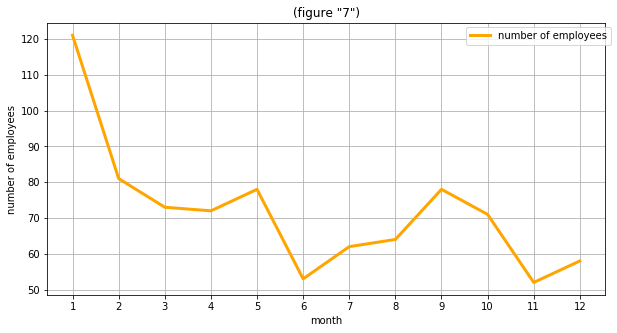

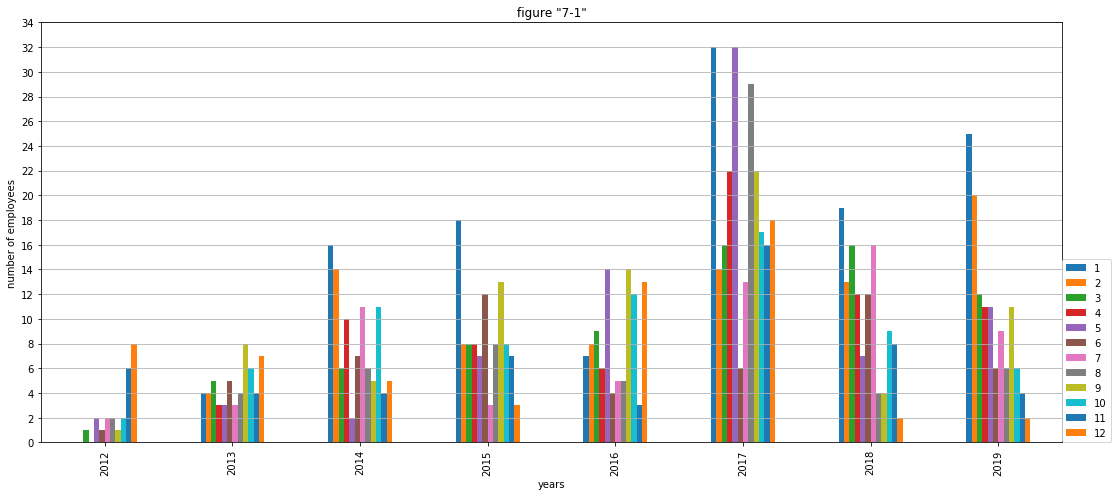

In [37]:
# calculating the total number of employees for all months over all years
month_count = pd.DataFrame(df_main['nat'].groupby(df_main.index.month).count())
month_count.index.name = 'Month over years'
month_count.columns = ['number of employees']
display(np.transpose(pd.DataFrame(month_count)))

# plotting all months over years
month_count.plot(kind='line', linewidth=3, color='orange', figsize=(10,5))
plt.xticks(range(1,13))
plt.ylabel('number of employees')
plt.xlabel('month')
plt.grid()
plt.title('(figure "7")')
plt.legend(loc=[0.75,0.92])
plt.show()

# comparing all months over the years
compare_month = count_by_month.replace(np.nan,0)
compare_month.columns = compare_month.columns.droplevel(level=0)
compare_month.plot(kind='bar', figsize=(15,7))
plt.title('figure "7-1"')
plt.xlabel('years')
plt.ylabel('number of employees')
plt.tight_layout()
plt.yticks(range(0,35,2))
plt.grid(axis='y')
plt.legend(loc=[1,0])
plt.show()

In [38]:
compare_month

leave,1,2,3,4,5,6,7,8,9,10,11,12
leave,,,,,,,,,,,,
2012,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,6.0,8.0
2013,4.0,4.0,5.0,3.0,3.0,5.0,3.0,4.0,8.0,6.0,4.0,7.0
2014,16.0,14.0,6.0,10.0,2.0,7.0,11.0,6.0,5.0,11.0,4.0,5.0
2015,18.0,8.0,8.0,8.0,7.0,12.0,3.0,8.0,13.0,8.0,7.0,3.0
2016,7.0,8.0,9.0,6.0,14.0,4.0,5.0,5.0,14.0,12.0,3.0,13.0
2017,32.0,14.0,16.0,22.0,32.0,6.0,13.0,29.0,22.0,17.0,16.0,18.0
2018,19.0,13.0,16.0,12.0,7.0,12.0,16.0,4.0,4.0,9.0,8.0,2.0
2019,25.0,20.0,12.0,11.0,11.0,6.0,9.0,6.0,11.0,6.0,4.0,2.0


### <u>Month statistics (figure 7)</u>
#### We notice from the table that january is the highest month at all, we notice also that january always higher in average than other months. However, if we considered that employees resigns before the leave date with one month at least as a notice, then we can see that january is high because many people provided their resignation on December for example which changes our prospective for high and low months.

  
### <u>Month statistics (figure 6-1)</u>
#### providing a chart of all months in each year in order to compare them to each other

In [39]:
# genrating code for filter  
top10 = df_main['job'].value_counts().head(10)  
t = ''  
for i in top10.index:
    t+= '(df_main["job"] == "' + i +'") | '  
t[:-2]

'(df_main["job"] == "Merchandiser") | (df_main["job"] == "Helper") | (df_main["job"] == "Sales Executive") | (df_main["job"] == "Driver") | (df_main["job"] == "Technician") | (df_main["job"] == "Asst Technician") | (df_main["job"] == "Senior Sales Executive") | (df_main["job"] == "Warehouse Asst") | (df_main["job"] == "Van Salesman") | (df_main["job"] == "Technician - Air Cons") '

In [40]:
df_top10 = df_main[(df_main["job"] == "Merchandiser") | (df_main["job"] == "Driver") | (df_main["job"] == "Helper") | (df_main["job"] == "Sales Executive") | (df_main["job"] == "Technician") | (df_main["job"] == "Technician - Air Cons") | (df_main["job"] == "Van Salesman") | (df_main["job"] == "Assistant Sales Executive") | (df_main["job"] == "Senior Sales Executive") | (df_main["job"] == "Senior Technician")]

In [41]:
# grouping data by top 10 jobs and month to provide job counts
df_top10_percentages = df_top10.loc[:,['job']].groupby([df_top10.index.month, df_top10['job']]).count().unstack().replace(np.nan,0)
df_top10_percentages.index.name = 'month'

# we divide the result of each job on other data frame includes the job counts of all jobs 
# to find the maximum and minimum percentage for each job, that they are expected to leave each month
df_top10_percentages.columns = df_top10_percentages.columns.droplevel(level=0)
df_job_month = pd.DataFrame(df_main['job'].groupby(df_main.index.month).count())
df_top10_percentages_final = np.round(df_top10_percentages.div(df_job_month['job'], axis=0) *100, 2)

# creating minimum , mean and max of each column to append them to the end of the dataframe table
lst_min_job_perc, lst_mean_job_perc, lst_max_job_perc = [], [], []

for i in df_top10_percentages_final.columns:
    lst_min_job_perc.append(df_top10_percentages_final.loc[:,[i]].min()[0])
    lst_mean_job_perc.append(df_top10_percentages_final.loc[:,[i]].mean()[0])
    lst_max_job_perc.append(df_top10_percentages_final.loc[:,[i]].max()[0])

# concatenting the max, avg, mean list with df_top10_percentages_final dataframe
pd.concat([df_top10_percentages_final,pd.DataFrame([lst_min_job_perc,lst_mean_job_perc,lst_max_job_perc],index=['Minimum', 'Average', 'Maximum'], columns=df_top10_percentages.columns)], axis=0)

job,Assistant Sales Executive,Driver,Helper,Merchandiser,Sales Executive,Senior Sales Executive,Senior Technician,Technician,Technician - Air Cons,Van Salesman
1,2.480000,4.1300,8.260000,17.360000,5.790000,1.650000,0.830000,6.610000,1.650000,1.650000
2,1.230000,4.9400,4.940000,14.810000,9.880000,0.000000,2.470000,2.470000,3.700000,0.000000
3,2.740000,6.8500,8.220000,28.770000,5.480000,4.110000,2.740000,1.370000,0.000000,8.220000
4,2.780000,1.3900,5.560000,15.280000,5.560000,1.390000,1.390000,2.780000,1.390000,5.560000
5,2.560000,1.2800,5.130000,26.920000,8.970000,1.280000,1.280000,3.850000,1.280000,1.280000
6,0.000000,7.5500,9.430000,18.870000,1.890000,9.430000,1.890000,1.890000,0.000000,1.890000
7,1.610000,6.4500,11.290000,22.580000,8.060000,3.230000,1.610000,6.450000,1.610000,0.000000
8,0.000000,3.1200,6.250000,31.250000,3.120000,1.560000,0.000000,4.690000,1.560000,4.690000
9,0.000000,2.5600,11.540000,23.080000,3.850000,1.280000,3.850000,3.850000,2.560000,1.280000
10,4.230000,7.0400,7.040000,26.760000,4.230000,2.820000,4.230000,2.820000,1.410000,0.000000


## <u>Explaining table of top 10 jobs percentages</u>
- **The table shows the percentage of each job that left in each month over all the years.**
- **The minimum and maximum and average are the expected rate for each of these jobs to leave each month**  
#### for example if there is 100 employees leave the company per month, it is expected that the average around 22% of them will be Merchandisers and up to 34% or more of total number of employees will be Merchandisers.  
### <b>As we saw above the average employees they leave the company every month around 10 employees, we expect 2:3 to be Merchandisers.</b>

# What are the highest and lowest months?

In [42]:
# calculating highest and lowest month 
display('The lowest month',count_by_month[count_by_month == count_by_month.min().min()],'The highest month' ,count_by_month[count_by_month == count_by_month.max().max()])

'The lowest month'

nat                                               
leave  1   2    3   4   5    6   7   8    9   10  11  12
leave                                                   
2012  NaN NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN
2013  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN
2014  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN
2015  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN
2016  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN
2017  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN
2018  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN
2019  NaN NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN

'The highest month'

nat                                              
leave    1   2   3   4     5   6   7   8   9   10  11  12
leave                                                    
2012    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2013    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2014    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2015    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2016    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2017   32.0 NaN NaN NaN  32.0 NaN NaN NaN NaN NaN NaN NaN
2018    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2019    NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN

#### We see that the lowest month is March 2012.
#### The maximum number was in January & May 2017.

# What is the higest department in employees left and what are the departments that they have less service periods?

,dept
Consumer Products,188
Logistics,188
Consumer Electronics & Home Appliances,105
General Products,81
Home Appliances Service Center,75
Office Equipment Service Center,67
Office Furniture & Furnishing,64
Office Equipment & Business Solutions,50
Finance,21
HR & Administration,16


Text(0.5, 1.0, '(figure "8")')

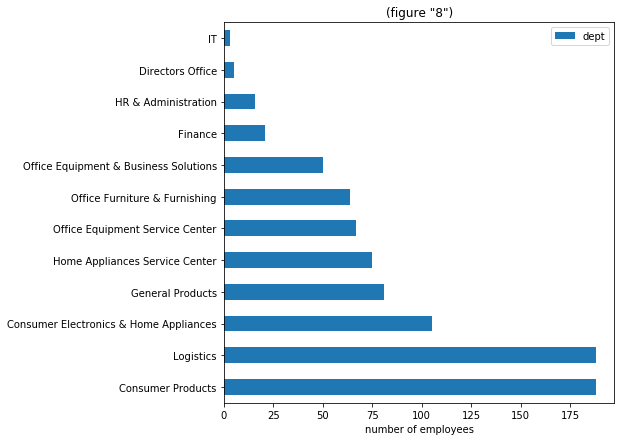

In [43]:
# calculating the service period per department
dept_count = df_main['dept'].value_counts()
display(pd.DataFrame(dept_count))
dept_count.plot(kind='barh', legend='dept', figsize=(7,7))
plt.xlabel('number of employees')
plt.title('(figure "8")')

#### We notice **(figure 8)** that Consumer Products & Logistics departments have the highest exit rate.
#### The lowest rate in Directors office and IT as the total number of employees in these departments are extremely low.
#### We notice also that HR and Finance Departments are stable and have less number of employees.

,service
dept,
Office Furniture & Furnishing,9.658048
HR & Administration,9.503082
Home Appliances Service Center,9.215379
Finance,8.293020
Logistics,6.539172
Office Equipment & Business Solutions,5.573753
General Products,4.966447
Directors Office,4.930411
Office Equipment Service Center,4.853854


Text(0.5, 1.0, '(figure "9")')

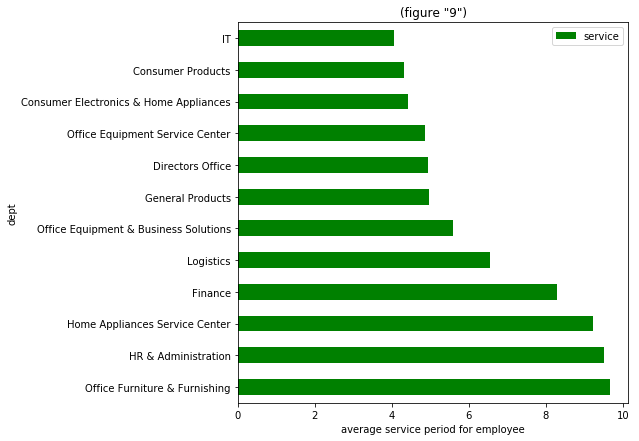

In [44]:
avg_service_per_dept = pd.DataFrame(df_main.groupby(['dept'])['service'].mean().sort_values(ascending=False))
display(avg_service_per_dept)
avg_service_per_dept.plot(kind='barh', color='green', figsize=(7,7))
plt.xlabel('average service period for employee')
plt.title('(figure "9")')

#### In last table and plot **(figure 9)**, if we excluded IT and Directors for their low numbers, we will find that Finance department has higher rates of employee service and stability and on the other hand Consumer Products Department is not stable and it has one of hot positions that requires continuous hiring.

,join_age
dept,
IT,27.062100
Consumer Products,27.082177
Consumer Electronics & Home Appliances,28.052368
Finance,28.132942
HR & Administration,28.966096
Office Equipment & Business Solutions,29.345699
General Products,30.220193
Office Equipment Service Center,30.629605
Logistics,30.737846


Text(0.5, 1.0, '(figure "10")')

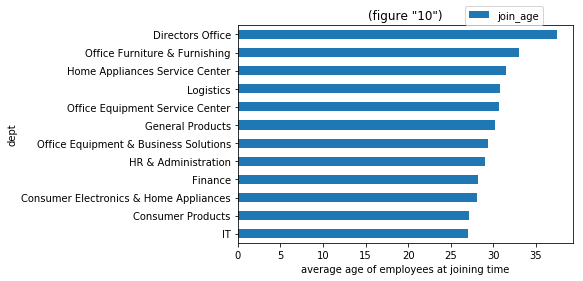

In [45]:
# we can check the employees joining age in each department
avg_join_age_dept = df_main.groupby(["dept"])["join_age"].mean().sort_values().to_frame()
display(avg_join_age_dept)
avg_join_age_dept.plot(kind="barh")
plt.legend(loc=[0.68,1])
plt.xlabel('average age of employees at joining time')
plt.title('(figure "10")')

### From the above plot (Figure 10): The youngest people joined where in IT and Consumer Products **27** years and the oldest people joined were in directors office at the age of **37** years.

,join_age
Merchandiser,25.620686
Helper,26.094049
Warehouse Asst,28.316301
Asst Technician,28.815068
Driver,30.195959
Technician - Air Cons,30.438356
Sales Executive,30.775231
Technician,31.044832
Senior Sales Executive,31.585803
Van Salesman,32.359863


Text(0.5, 1.0, '(figure "11")')

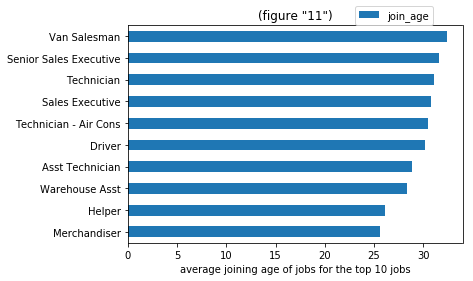

In [46]:
#checking the average age for each job in the top 10 jobs
avg_join_age_job = df_main.groupby(["job"])["join_age"].mean().sort_values().to_frame()
display(avg_join_age_job.loc[job_count['percentages'][0:10].index].sort_values(by="join_age"))
avg_join_age_job.loc[job_count['percentages'][0:10].index].sort_values(by="join_age").plot(kind="barh")
plt.legend(loc=[0.68,1])
plt.xlabel('average joining age of jobs for the top 10 jobs')
plt.title('(figure "11")')

### From the previous plot figure 11: we can observe that Merchandiser job has the youngest ages with **25** years and van salesman has the highest **32** years

,martial_status
Married,57.473928
Single,41.830823
Divorced,0.579374
Widow,0.115875


Text(0.5, 1.0, '(figure "12")')

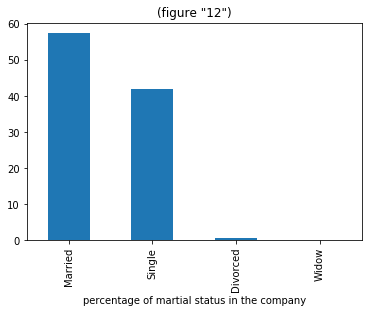

In [47]:
# checking most martial status for the people who left
martial_status = (df_main["martial_status"].value_counts() / df_main.shape[0]) * 100
display(martial_status.to_frame())
(martial_status).plot(kind="bar")
plt.xlabel('percentage of martial status in the company')
plt.title('(figure "12")')

We can see in figure 12 that most of employees are married **57.5%** and the remaining are singles **41.8%** with very low percentage for Divorced and widow.

,Divorced,Married,Single,Widow
dept,,,,
Consumer Electronics & Home Appliances,0.000000,44.761905,55.238095,0.000000
Consumer Products,0.000000,46.808511,52.659574,0.531915
Directors Office,0.000000,60.000000,40.000000,0.000000
Finance,0.000000,61.904762,38.095238,0.000000
General Products,1.234568,59.259259,39.506173,0.000000
HR & Administration,0.000000,62.500000,37.500000,0.000000
Home Appliances Service Center,1.333333,68.000000,30.666667,0.000000
IT,0.000000,33.333333,66.666667,0.000000
Logistics,1.595745,63.297872,35.106383,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

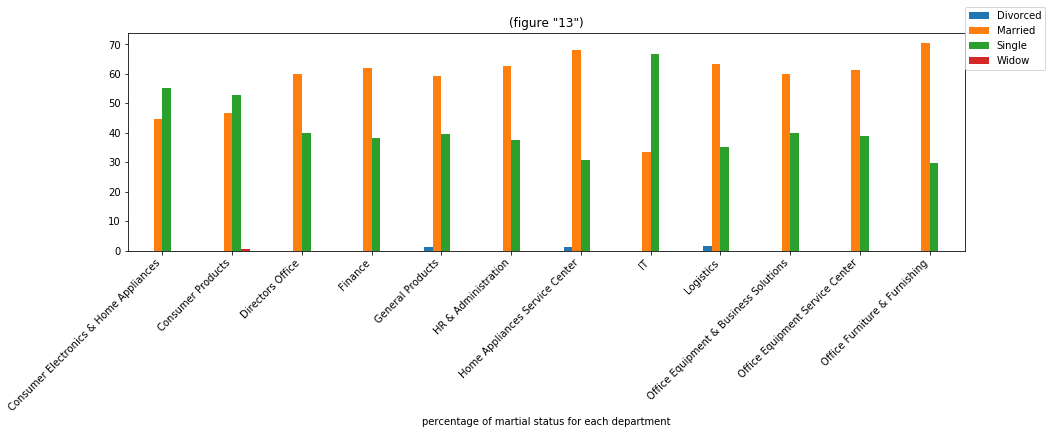

In [48]:
# showing the percentage of martial status percentage in each department
dept_martial = df_main.groupby(["dept","martial_status"])["job"].count().unstack(level=1).replace(np.nan,0)
dept_martial = dept_martial.join(dept_count)
# looping throught the departments to collect the percentages of martial status in each 
for i in range(4):
    dept_martial[dept_martial.columns[i]] =  dept_martial[dept_martial.columns[i]]/dept_martial["dept"] *100
dept_martial.drop("dept",axis=1, inplace=True)
display(dept_martial)

dept_martial.plot(kind="bar", figsize=(15,4))
plt.legend(loc=(1,0.83))
plt.xlabel('percentage of martial status for each department')
plt.title('(figure "13")')
plt.xticks(rotation = 45, ha="right")


### In figure 13: we see that most of departments dominated by married employees except Consumer Electronics, Consumer products and IT

------------------------

# <u id="relations" >Exploring relationships between different variables:</u>

- The relation between joining age and service

Text(0.5, 1.0, 'figure "14"')

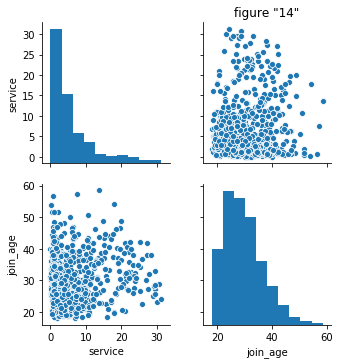

In [49]:
sns.pairplot(df_main)
plt.title('figure "14"')

,service,join_age
service,1.000000,0.116607
join_age,0.116607,1.000000


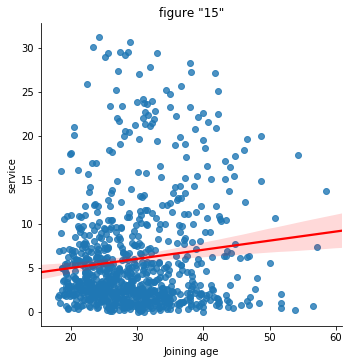

In [50]:
sns.lmplot("join_age","service", df_main,line_kws={'color': 'red'})
plt.xlabel("Joining age")
plt.title('figure "15"')
df_main.corr()

### From the corrleation coefficient matrix and plot figure 14 & 15 , we notice that there is a weak relationship between joining age and service years 

In [51]:
# exploring the qualification for each department with average service 

# getting qualfication percentage for each department
dept_by_qualificaiton = df_main.groupby(["dept","qualification"])["job"].count().unstack(level=1).replace(np.nan, 0)

# removing one category becayse it represents one employee in our dataset
dept_by_qualificaiton.drop("Chartered Accountant",axis=1, inplace=True)

# merging the qualfication with department employees count
dept_by_qualificaiton = dept_by_qualificaiton.join(dept_count)

# looping through the 4 types of our qualfications for each department considering each department is one unit 100%
for i in range(4):
    dept_by_qualificaiton[dept_by_qualificaiton.columns[i]] =  dept_by_qualificaiton[dept_by_qualificaiton.columns[i]]/dept_by_qualificaiton["dept"] *100

# remvong unncessary column for department as we already have it in the index
dept_by_qualificaiton.drop("dept",axis=1, inplace=True)

# merging the qualfication by department with the average service using department in the index to merge
dept_by_qualificaiton = dept_by_qualificaiton.join(avg_service_per_dept)

# showing the dataframe
dept_by_qualificaiton

,Bachelors,Diploma,High School,Masters,Primary School,service
dept,,,,,,
Consumer Electronics & Home Appliances,20.952381,7.619048,53.333333,0.952381,0.0,4.420587
Consumer Products,12.765957,2.127660,67.021277,3.191489,0.0,4.311615
Directors Office,40.000000,0.000000,0.000000,20.000000,0.0,4.930411
Finance,42.857143,4.761905,23.809524,14.285714,0.0,8.293020
General Products,13.580247,4.938272,67.901235,3.703704,0.0,4.966447
HR & Administration,37.500000,6.250000,37.500000,6.250000,0.0,9.503082
Home Appliances Service Center,5.333333,18.666667,56.000000,0.000000,4.0,9.215379
IT,66.666667,0.000000,33.333333,0.000000,0.0,4.063927
Logistics,8.510638,2.127660,55.319149,1.063830,11.0,6.539172


In [52]:
# finding correlation between some figures
print("The correlation between service and bachelor degree:\n", np.corrcoef(dept_by_qualificaiton["Bachelors"],dept_by_qualificaiton["service"]))
print("The correlation between service and high school degree:\n",np.corrcoef(dept_by_qualificaiton["High School"],dept_by_qualificaiton["service"]))

The correlation between service and bachelor degree:
 [[ 1.         -0.20074178]
 [-0.20074178  1.        ]]
The correlation between service and high school degree:
 [[1.         0.02212787]
 [0.02212787 1.        ]]


Text(0.5, 1.0, 'figure "16"')

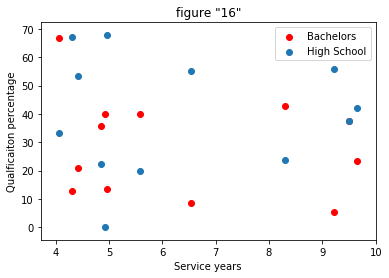

In [53]:
# plotting them together for better understanding in case of any relations.
plt.scatter(dept_by_qualificaiton["service"],dept_by_qualificaiton["Bachelors"], color='r')  
plt.scatter(dept_by_qualificaiton["service"],dept_by_qualificaiton["High School"])
plt.xlabel('Service years')
plt.ylabel('Qualficaiton percentage')
plt.legend(["Bachelors", "High School"])
plt.title('figure "16"')

### From the corrleation coefficient matrix and plot figure 16 , we notice that there is a weak relationship between qualification and service years 

Text(0.5, 1.0, 'figure "17"')

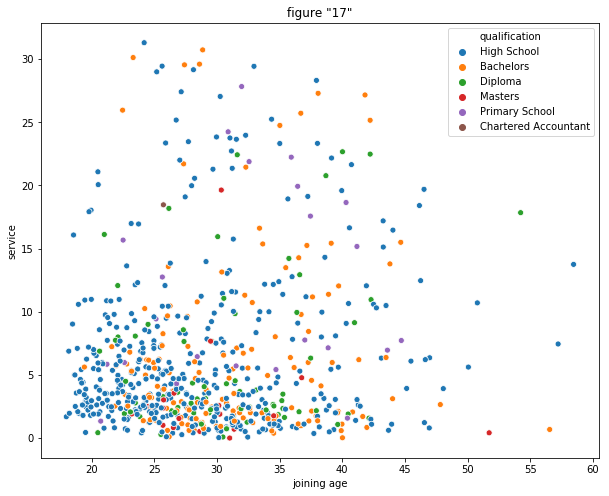

In [54]:
# checking the relation between service and joining age considering the qualification
plt.figure(figsize=(10,8))  
sns.scatterplot("join_age","service", data=df_main, hue="qualification")
plt.xlabel("joining age")
plt.title('figure "17"')

### We observe in figure 17: the people who join at young age mostly they have high schiik and diploma, specially at the age of 22 or less, then after the age of 25 we see significant inccrease in the number of employees that have Bachelor degree and Masters

Text(0.5, 1.0, 'figure "18"')

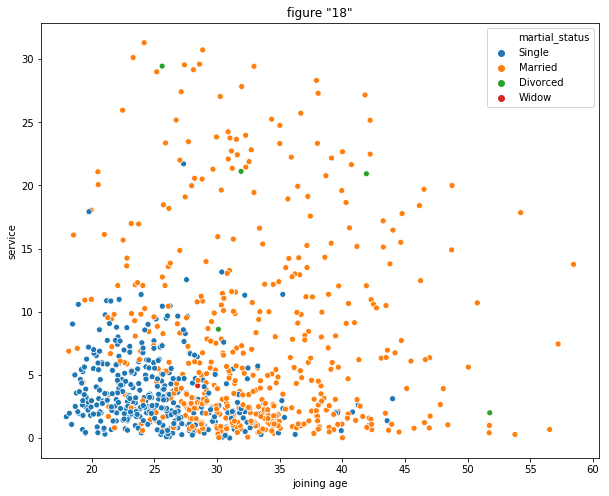

In [55]:
# checking the relation between service and joining age considering the martial status
plt.figure(figsize=(10,8))  
sns.scatterplot("join_age","service", data=df_main, hue="martial_status")
plt.xlabel("joining age")
plt.title('figure "18"')

### From the previous figure 18, it is obvious that people who join early they are single and their service period looks lower than those who are married. The thing that may indicate a relation between service period and martial status. We should dig depper for more about this relation.

> #### we will join the average service period for department and the department martial status percentages
> #### we will see if there is a relation between higher avg service for each department associated with martial status percentage and we will do it with married and single columns

Marriage correlation [[ 1.         -0.36802241]
 [-0.36802241  1.        ]]
Single correlation [[1.         0.37096525]
 [0.37096525 1.        ]]


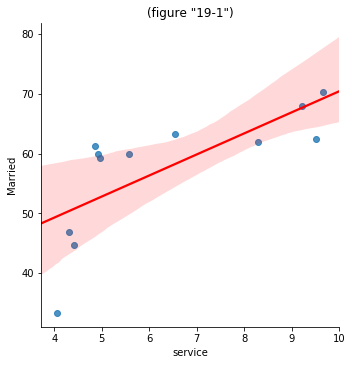

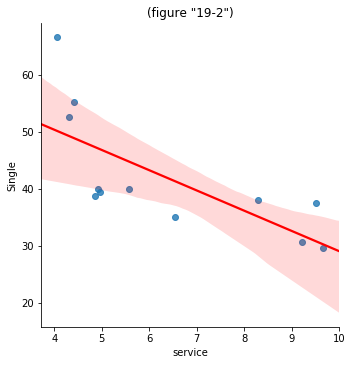

In [56]:
# relation between being married or single and service years

#joining average service per department dataframe with married employees rates of departments
corr_service_marriage = pd.concat([avg_service_per_dept["service"],dept_martial["Married"]],axis=1)
# generating linear regression plot
sns.lmplot("service","Married", corr_service_marriage,line_kws={'color': 'red'})
plt.title('(figure "19-1")')
print("Marriage correlation",np.corrcoef(dept_martial["Married"],avg_service_per_dept["service"] ))

#joining average service per department dataframe with single employees rates of departments
corr_service_single = pd.concat([avg_service_per_dept["service"],dept_martial["Single"]],axis=1)
# generating linear regression plot
sns.lmplot("service","Single", corr_service_single,line_kws={'color': 'red'})
plt.title('(figure "19-2")')
print("Single correlation",np.corrcoef(dept_martial["Single"],avg_service_per_dept["service"] ))

### From the previous figures 19-1 & 19-2, there is a moderate relationship between service period and martial status.
### Department with higher average service period tend to have higher married rate of employees and the opposite is true, that departments with high rate single employees tend to have less average service period.

Text(0.5, 1.0, 'figure "20"')

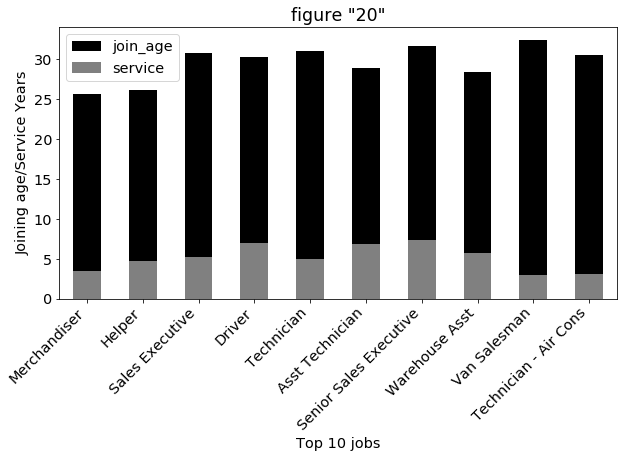

In [62]:
#exploring the relations between service years and joining date for top 10 jobs

# merging the dataframe of top 10 jops with average service
df_top10_join_service = top10.to_frame().join(df_main.groupby(["job"])[["join_age","service"]].mean())
# removing the count column
df_top10_join_service.drop("job",axis=1, inplace=True)



plt.figure(figsize=(10,5))

pl1 = df_top10_join_service["join_age"].plot(kind='bar', legend=True, color='k')
pl2 = df_top10_join_service["service"].plot(kind='bar', legend=True, color='grey')

plt.xticks(np.arange(10), df_top10_join_service.index)
plt.setp(pl1.xaxis.get_majorticklabels(), rotation=45, ha='right' )
pl1.set_xlabel("Top 10 jobs")
pl1.set_ylabel("Joining age/Service Years")
plt.title('figure "20"')

In [63]:
# we save the data frame for further analysis
df_main.to_csv("full_exit_data_cleaned.csv")

---

## <u id ="conclusion">Conclusion:</u>
- **There are some jobs which require quick actions and to be ready for them with immediate candidates and there are some jobs that employees spend longer time in them.**
- **We can notice that there are some departments that have active jobs and people move in and out quickly and there are some departments that they stand still.**

## <b><u id="fnotes">Final Notes:</u></b>
- **We did not analyse joining years as the analysis is about exit and also we do not have all needed data for employees who joined because not all employees joined left, however, this may give us a better idea about the joining age for each job and the employees who leave.**
- **This analysis can be improved by collecting more features like proposed salary, benefits and more features that may give better undestanding for the people who leave because of low salary for example.**